## City of Toronto Collisions Data


The Total Collisions Dataset is a CSV file containing detailed records of motor vehicle collisions within the City of Toronto. The dataset uses the WGS84 Coordinate Reference System, ensuring consistent geographic representation of collision locations. Key attributes include the geographic location of each collision, whether it resulted in a fatality or injury, and the timestamp of the event. For our analysis, we will focus on data from 2021 to 2024 to align with recent census data, providing insights into contemporary trends and patterns in collisions. Additionally, the dataset may include supplementary fields such as road conditions, weather visibility, and types of vehicles involved, offering a comprehensive view of the contributing factors to these incidents. By analyzing this dataset, we aim to identify high-risk areas and underlying causes of collisions to inform preventative strategies and improve road safety.

## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

/Users/aaliyashaikh/Library/Python/3.8/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import GeoJson Data

In [2]:
# Create a base map
map_2 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='OpenStreetMap', 
                   zoom_start=10)

# Correct the GeoJSON file path
geojson_file_path = "FATALS_KSI_4359710384762535516.geojson"

# Ensure the file exists at the specified path
try:
    folium.GeoJson(geojson_file_path, name="Collision Data").add_to(map_2)
    # Display the map
    map_2
except FileNotFoundError:
    print(f"Error: The file '{geojson_file_path}' was not found. Please verify the path.")

# Display the map directly in the notebook
display(map_2)

In [3]:
# Import dataset as a DataFrane
collision_data = gpd.read_file('FATALS_KSI_4359710384762535516.geojson')

# View DataFrame
collision_data.head()

OBJECTID   INDEX_  ACCNUM                           DATE  TIME  \
0         1  3363207  882024  Sat, 07 Jan 2006 05:00:00 GMT  2325   
1         2  3363869  882497  Sun, 08 Jan 2006 05:00:00 GMT  1828   
2         3  3363416  882174  Mon, 09 Jan 2006 05:00:00 GMT  1435   
3         4  3363879  882501  Wed, 11 Jan 2006 05:00:00 GMT  1120   
4         5  3371161  886230  Sat, 21 Jan 2006 05:00:00 GMT  1829   

         STREET1        STREET2 OFFSET      ROAD_CLASS        DISTRICT  ...  \
0  STEELES AVE E  NINTH LINE ST   None  Minor Arterial     Scarborough  ...   
1  ISLINGTON AVE    GOLFDOWN DR   None  Major Arterial  Etobicoke York  ...   
2     KENNEDY RD  GLAMORGAN AVE   None  Major Arterial     Scarborough  ...   
3     BARTLEY DR     JINNAH CRT   None       Collector      North York  ...   
4    MIDLAND AVE    GOODLAND GT   None  Major Arterial     Scarborough  ...   

   AG_DRIV  REDLIGHT ALCOHOL DISABILITY HOOD_158  \
0     None      None    None       None      144   
1      Yes      None    None       None        5   
2     None      None    None       None      126   
3      Yes      None    None       None       43   
4      Yes      None    None       None      128   

              NEIGHBOURHOOD_158 HOOD_140                   NEIGHBOURHOOD_140  \
0           Morningside Heights      131                         Rouge (131)   
1              Elms-Old Rexdale        5                Elms-Old Rexdale (5)   
2                   Dorset Park      126                   Dorset Park (126)   
3              Victoria Village       43               Victoria Village (43)   
4  Agincourt South-Malvern West      128  Agincourt South-Malvern West (128)   

  DIVISION                    geometry  
0      D42  POINT (-79.22479 43.84275)  
1      D23  POINT (-79.55809 43.72145)  
2      D41  POINT (-79.28229 43.76945)  
3      D55  POINT (-79.30799 43.72205)  
4      D42  POINT (-79.27559 43.77935)  

[5 rows x 53 columns]

## Data Analysis

In [4]:
# Check the number of columns and rows
collision_data.shape

(976, 53)

In [5]:
# Check the columns in DataFrame
collision_data.columns

Index(['OBJECTID', 'INDEX_', 'ACCNUM', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE',
       'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
       'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY',
       'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
       'DIVISION', 'geometry'],
      dtype='object')

Based on the Toronto Police Service's Traffic Collisions Open Data (ASR-T-TBL-001), here is a description of each column in the dataset:

- OBJECTID: Unique identifier for each record in the dataset.
- INDEX: Sequential number assigned to each collision event.
- ACCNUM: Unique accident number assigned by the police.
- DATE: Date when the collision occurred.
- TIME: Time of day when the collision occurred.
- STREET1: Primary street where the collision took place.
- STREET2: Secondary street involved in the collision (if applicable).
- OFFSET: Distance from the intersection or reference point.
- ROAD_CLASS: Classification of the road (e.g., arterial, collector).
- DISTRICT: Police district where the collision occurred.
- LATITUDE: Geographic latitude coordinate of the collision location.
- LONGITUDE: Geographic longitude coordinate of the collision location.
- ACCLOC: Specific location details of the accident.
- TRAFFCTL: Type of traffic control present at the collision site.
- VISIBILITY: Visibility conditions at the time of the collision.
- LIGHT: Lighting conditions during the collision (e.g., daylight, dark).
- RDSFCOND: Road surface conditions at the time of the collision.
- ACCLASS: Classification of the accident (e.g., fatal, non-fatal injury).
- IMPACTYPE: Type of impact during the collision (e.g., rear-end, side).
- INVTYPE: Type of individuals involved (e.g., driver, pedestrian).
- INVAGE: Age of the individuals involved in the collision.
- INJURY: Severity of injuries sustained (e.g., none, minor, fatal).
- FATAL_NO: Number of fatalities resulting from the collision.
- INITDIR: Initial direction of travel of the vehicles involved.
- VEHTYPE: Type of vehicles involved in the collision.
- MANOEUVER: Maneuver being performed by the vehicle at the time of collision.
- DRIVACT: Driver's action leading up to the collision.
- DRIVCOND: Driver's condition at the time of the collision (e.g., normal, impaired).
- PEDTYPE: Type of pedestrian involved (if applicable).
- PEDACT: Pedestrian's action leading up to the collision.
- PEDCOND: Pedestrian's condition at the time of the collision.
- CYCLISTYPE: Type of cyclist involved (if applicable).
- CYCACT: Cyclist's action leading up to the collision.
- CYCCOND: Cyclist's condition at the time of the collision.
- PEDESTRIAN: Indicator if a pedestrian was involved.
- CYCLIST: Indicator if a cyclist was involved.
- AUTOMOBILE: Indicator if an automobile was involved.
- MOTORCYCLE: Indicator if a motorcycle was involved.
- TRUCK: Indicator if a truck was involved.
- TRSN_CITY_VEH: Indicator if a city transit vehicle was involved.
- EMERG_VEH: Indicator if an emergency vehicle was involved.
- PASSENGER: Indicator if passengers were involved.
- SPEEDING: Indicator if speeding was a factor.
- AG_DRIV: Indicator if aggressive driving was a factor.
- REDLIGHT: Indicator if running a red light was a factor.
- ALCOHOL: Indicator if alcohol was a factor.
- DISABILITY: Indicator if a disability was a factor.
- HOOD_158: Neighborhood identifier based on 158 neighborhood divisions.
- NEIGHBOURHOOD_158: Name of the neighborhood (158 divisions).
- HOOD_140: Neighborhood identifier based on 140 neighborhood divisions.
- NEIGHBOURHOOD_140: Name of the neighborhood (140 divisions).
- DIVISION: Police division responsible for the area.
- geometry: X and Y coordinate in a projected coordinate system.

In [6]:
# Check data types per column
print(collision_data.dtypes)

OBJECTID                int64
INDEX_                 object
ACCNUM                 object
DATE                   object
TIME                   object
STREET1                object
STREET2                object
OFFSET                 object
ROAD_CLASS             object
DISTRICT               object
LATITUDE              float64
LONGITUDE             float64
ACCLOC                 object
TRAFFCTL               object
VISIBILITY             object
LIGHT                  object
RDSFCOND               object
ACCLASS                object
IMPACTYPE              object
INVTYPE                object
INVAGE                 object
INJURY                 object
FATAL_NO              float64
INITDIR                object
VEHTYPE                object
MANOEUVER              object
DRIVACT                object
DRIVCOND               object
PEDTYPE                object
PEDACT                 object
PEDCOND                object
CYCLISTYPE             object
CYCACT                 object
CYCCOND   

In [7]:
# Check numerical statistics for each column
collision_data.describe()

OBJECTID    LATITUDE   LONGITUDE    FATAL_NO
count  976.000000  976.000000  976.000000  865.000000
mean   488.500000   43.717105  -79.393589   28.865896
std    281.891232    0.056949    0.110108   17.642949
min      1.000000   43.589678  -79.620990    1.000000
25%    244.750000   43.668795  -79.477800   14.000000
50%    488.500000   43.719124  -79.397106   28.000000
75%    732.250000   43.760350  -79.303615   42.000000
max    976.000000   43.848780  -79.146190   78.000000


To identify collision patterns within an area, not all columns in the dataset are essential. Below is an analysis of columns that can be dropped because they do not directly contribute to the understanding of collision patterns:
- OBJECTID: Unique record identifier; not useful for analysis.
- INDEX: Sequential numbering of collisions; redundant information.
- ACCNUM: Police-assigned accident number; not relevant for pattern analysis.
- OFFSET: Distance from a reference point; not essential for broad collision patterns.
- HOOD_158: Numeric neighborhood identifier (already represented by NEIGHBOURHOOD_158).
- NEIGHBOURHOOD_158: Neighborhood name with 158 divisions; redundant if you use the 140-division version.
- HOOD_140: Numeric neighborhood identifier (already represented by NEIGHBOURHOOD_140).
- GEOMETRY: Projected coordinate system values; not needed if LATITUDE and LONGITUDE are available.
- INITDIR: Initial direction of travel; unlikely to impact spatial collision patterns.
- TRAFFCTL: Type of traffic control; may not directly impact patterns in broader spatial or temporal analysis.
- INVTYPE: Type of individuals involved; focuses on the individuals rather than collision patterns.
- PEDTYPE, PEDACT, PEDCOND: Focus on pedestrian-specific details; drop if your analysis isn’t focused on pedestrian collisions.
- CYCLISTYPE, CYCACT, CYCCOND: Focus on cyclist-specific details; drop if your analysis isn’t focused on cyclist collisions.
- PASSENGER: Indicator for passengers involved; does not directly contribute to spatial or temporal patterns.
- TRSN_CITY_VEH: Indicator for transit vehicles; drop unless public transit-related collisions are of interest.
- DIVISION: Police division; not directly linked to spatial collision patterns if geographic data is already included.
- STREET1, STREET2, DISTRICT: Don't need as the coordinates are being used and can be connected to the Wards dataset.


In [8]:
# Drop columns 
collision_data = collision_data.drop(columns = ['OBJECTID', 'INDEX_', 'ACCNUM', 'STREET1', 'STREET2',
                                      'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'ACCLOC','TRAFFCTL', 
                                      'IMPACTYPE','INVTYPE', 'INJURY', 'FATAL_NO', 'INITDIR',
                                      'MANOEUVER', 'DRIVACT', 'PEDTYPE', 'PEDACT', 'PEDCOND',
                                      'CYCLISTYPE', 'CYCACT', 'CYCCOND','PASSENGER','HOOD_158', 
                                      'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
                                      'DIVISION', 'geometry', 'VEHTYPE'], errors='ignore')

# Check if columns are removed
collision_data.columns

Index(['DATE', 'TIME', 'LATITUDE', 'LONGITUDE', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'INVAGE', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')

## Data Cleaning

Data cleaning for the collision dataset ensures:

- Accuracy: Removes errors and inconsistencies.
- Efficiency: Streamlines the dataset for quicker and easier analysis.
- Reliability: Produces trustworthy insights and recommendations.
- Focus: Tailors the data for the specific analysis of collision patterns and trends.

In [9]:
# Check for missing values
print(collision_data.isnull().sum())

DATE               0
TIME               0
LATITUDE           0
LONGITUDE          0
VISIBILITY        12
LIGHT              2
RDSFCOND          13
ACCLASS            1
INVAGE             0
DRIVCOND         699
PEDESTRIAN       430
CYCLIST          930
AUTOMOBILE       162
MOTORCYCLE       874
TRUCK            868
TRSN_CITY_VEH    904
EMERG_VEH        975
SPEEDING         782
AG_DRIV          534
REDLIGHT         915
ALCOHOL          930
DISABILITY       956
dtype: int64


Handling missing values should be approached differently for numerical and categorical data to ensure the dataset's integrity and reliability. For numerical columns, such as LATITUDE, LONGITUDE, or SPEEDING, missing values can be imputed using statistically meaningful methods like the mean or median, depending on the distribution. This ensures that numerical characteristics are preserved without introducing bias, allowing smooth analysis and modeling. However, for categorical columns like VISIBILITY, LIGHT, or RDSFCOND, missing values often carry contextual meaning, such as unrecorded or unknown data. Imputing these values with the most frequent category (mode) could distort the actual patterns and introduce bias. Instead, categorical columns are better handled by retaining NaN values or replacing them with a placeholder like "Unknown" or "Not Recorded", preserving their contextual integrity. By treating these data types differently, we ensure accurate and meaningful analysis without compromising the dataset's validity.

In [10]:
# Function to handle missing data for both numerical and categorical columns
def handle_missing_data(collision_data):
    for column in collision_data.columns:
        if collision_data[column].isnull().sum() > 0:  # Check for missing values
            if pd.api.types.is_numeric_dtype(collision_data[column]):
                # Numerical data: Use mean or median based on skewness
                skewness = collision_data[column].skew()
                if abs(skewness) < 0.5:  # Normally distributed
                    impute_value = collision_data[column].mean()
                    print(f"Imputing missing values in numerical column '{column}' with mean: {impute_value:.2f}")
                else:  # Skewed distribution
                    impute_value = collision[column].median()
                    print(f"Imputing missing values in numerical column '{column}' with median: {impute_value:.2f}")
                collision_data[column].fillna(impute_value, inplace=True)
            
    return collision_data

# Handle missing data
collision_handled = handle_missing_data(collision_data)


In [11]:
# Verify that missing values have been handled
print(collision_handled.isnull().sum())

DATE               0
TIME               0
LATITUDE           0
LONGITUDE          0
VISIBILITY        12
LIGHT              2
RDSFCOND          13
ACCLASS            1
INVAGE             0
DRIVCOND         699
PEDESTRIAN       430
CYCLIST          930
AUTOMOBILE       162
MOTORCYCLE       874
TRUCK            868
TRSN_CITY_VEH    904
EMERG_VEH        975
SPEEDING         782
AG_DRIV          534
REDLIGHT         915
ALCOHOL          930
DISABILITY       956
dtype: int64


All numerical missing (null) values have been dealt with (removed or imputed). Let's also remove all duplicates. 

In [12]:
# Remove Duplicates
collision_data.drop_duplicates(inplace=True)

Now let's remove outliers with the Interquartile Range method. 

In [13]:
# Function to calculate IQR and remove outliers
def remove_outliers(collision_data,column):
    Q1 = collision_data[column].quantile(0.25)  # 25th percentile
    Q3 = collision_data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                   # Inter-Quartile Range
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows with outliers
    return collision_data[(collision_data[column] >= lower_bound) & (collision_data[column] <= upper_bound)]

# List of numeric columns
numeric_columns = collision_data.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers using the IQR method
for column in numeric_columns:
    collision_data = remove_outliers(collision_data, column)

That is all for data cleaning, let's see the new size of the dataset.

In [14]:
collision_data.shape

(971, 22)

In [ ]:
# View DataFrame
collision_data.head()

DATE  TIME   LATITUDE  LONGITUDE VISIBILITY  \
0  Sat, 07 Jan 2006 05:00:00 GMT  2325  43.842745  -79.22479      Clear   
1  Sun, 08 Jan 2006 05:00:00 GMT  1828  43.721445  -79.55809      Clear   
2  Mon, 09 Jan 2006 05:00:00 GMT  1435  43.769445  -79.28229      Clear   
3  Wed, 11 Jan 2006 05:00:00 GMT  1120  43.722045  -79.30799      Clear   
4  Sat, 21 Jan 2006 05:00:00 GMT  1829  43.779345  -79.27559      Clear   

      LIGHT RDSFCOND ACCLASS    INVAGE DRIVCOND  ... AUTOMOBILE MOTORCYCLE  \
0      Dark      Wet   Fatal  50 to 54  Unknown  ...        Yes       None   
1      Dark      Dry   Fatal  10 to 14     None  ...        Yes       None   
2  Daylight      Dry   Fatal  75 to 79     None  ...        Yes       None   
3  Daylight      Wet   Fatal  15 to 19     None  ...        Yes       None   
4      Dusk      Dry   Fatal  50 to 54     None  ...        Yes       None   

  TRUCK TRSN_CITY_VEH EMERG_VEH SPEEDING AG_DRIV REDLIGHT ALCOHOL DISABILITY  
0  None          None      None     None    None     None    None       None  
1  None          None      None     None     Yes     None    None       None  
2  None          None      None     None    None     None    None       None  
3  None          None      None      Yes     Yes     None    None       None  
4  None          None      None      Yes     Yes     None    None       None  

[5 rows x 22 columns]

## Exploratory Data Analysis of Collisions Data

The exploratory data analysis (EDA) for the collisions dataset aims to uncover patterns, trends, and insights into the distribution and characteristics of collisions across Toronto. By examining factors such as temporal trends, spatial distributions, road conditions, light conditions, and driver behavior, we can better understand the key contributors to traffic incidents. This analysis provides a foundational understanding of the dataset, enabling us to identify high-risk areas, seasonal patterns, and other influential factors that impact collision frequency. Through this EDA, we aim to generate actionable insights that can inform road safety initiatives, policy decisions, and future predictive modeling efforts.

### Extracted Time Features from Collision Data

After converting the `DATE` column to a proper datetime format, we extracted several time-based attributes to analyze collision patterns more effectively. The following features were derived:

1. **Year**: The year in which the collision occurred.
2. **Month**: The month of the collision (1 = January, 12 = December).
3. **Day of the Week**: The name of the day (e.g., Monday, Tuesday).
4. **Hour**: The hour of the day when the collision occurred (0-23).

These features allow for temporal analysis of the data, such as identifying trends over years, seasonal patterns, or the most common days and hours for collisions. For example, examining collisions by the day of the week can help identify whether weekdays or weekends experience more accidents, while the hour attribute can reveal peak traffic or high-risk hours.



In [49]:
# Ensure the DATE column is in datetime format
collision_data['DATE'] = pd.to_datetime(collision_data['DATE'], errors='coerce')

# Extract year, month, day of the week, and hour
collision_data['Year'] = collision_data['DATE'].dt.year
collision_data['Month'] = collision_data['DATE'].dt.month
collision_data['DayOfWeek'] = collision_data['DATE'].dt.day_name()
collision_data['Hour'] = collision_data['DATE'].dt.hour

# Display the updated DataFrame
print(collision_data.head())

                 DATE  TIME   LATITUDE  LONGITUDE VISIBILITY     LIGHT  \
0 2006-01-07 05:00:00  2325  43.842745  -79.22479      Clear      Dark   
1 2006-01-08 05:00:00  1828  43.721445  -79.55809      Clear      Dark   
2 2006-01-09 05:00:00  1435  43.769445  -79.28229      Clear  Daylight   
3 2006-01-11 05:00:00  1120  43.722045  -79.30799      Clear  Daylight   
4 2006-01-21 05:00:00  1829  43.779345  -79.27559      Clear      Dusk   

  RDSFCOND ACCLASS    INVAGE DRIVCOND  ... SPEEDING AG_DRIV REDLIGHT ALCOHOL  \
0      Wet   Fatal  50 to 54  Unknown  ...     None    None     None    None   
1      Dry   Fatal  10 to 14     None  ...     None     Yes     None    None   
2      Dry   Fatal  75 to 79     None  ...     None    None     None    None   
3      Wet   Fatal  15 to 19     None  ...      Yes     Yes     None    None   
4      Dry   Fatal  50 to 54     None  ...      Yes     Yes     None    None   

  DISABILITY                    geometry  Year Month  DayOfWeek Hour  
0  


These extracted features will support predictive modeling, such as forecasting collisions by time or understanding time-based risk factors within each ward.

### Yearly Collision Trends Analysis

Understanding the yearly trends in collision data is essential for identifying patterns over time, such as increases or decreases in the number of collisions. This analysis can highlight the effectiveness of safety interventions or reveal emerging risks that require attention. By plotting the number of collisions for each year, we can assess long-term trends, which can inform city planning, policy-making, and resource allocation for traffic safety improvements. The following code calculates and visualizes the yearly collision trends from the dataset to provide these insights.


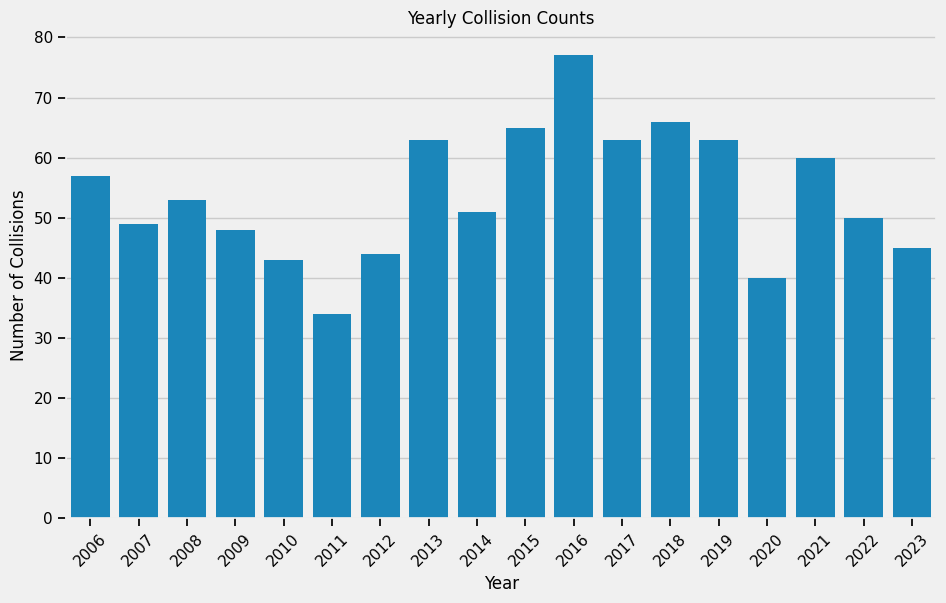

In [52]:
# Plot collisions per year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=collision_data)
plt.title('Yearly Collision Counts')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()


The bar chart illustrates the yearly trend in collision counts from 2006 to 2023. The data reveals fluctuations in the number of collisions over the years. A notable increase is observed around 2013, with the peak occurring in 2016. Afterward, there is a gradual decline in collisions, with significant drops evident during 2020 and 2021, likely corresponding to reduced vehicular activity due to the COVID-19 pandemic. In recent years, collisions show a slight recovery but remain below pre-2020 levels. This trend highlights the potential influence of external factors like policy changes, urban development, or societal disruptions on collision rates.


### Monthly Collision Patterns

Understanding the distribution of collisions across months provides valuable insights into seasonal trends and potential environmental or behavioral factors influencing road safety. Analyzing monthly collision patterns can help identify peak months for collisions, enabling policymakers and urban planners to implement targeted safety measures during high-risk periods. Below, we will explore the monthly collision trends using the dataset.

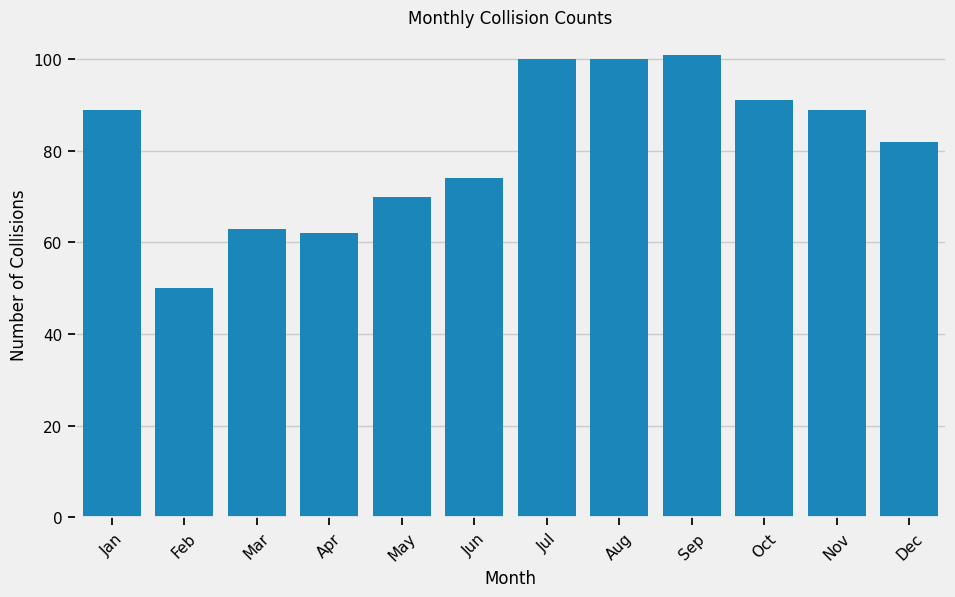

In [53]:
# Plot collisions per month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=collision_data)
plt.title('Monthly Collision Counts')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

The chart illustrates the distribution of collisions across each month, revealing distinct seasonal trends. January experiences the highest number of collisions, likely due to adverse winter weather conditions, such as snow and ice, that impact road safety. A gradual decrease in collisions is observed during the spring months, indicating improved driving conditions as weather stabilizes. However, the number of collisions rises again in late summer and autumn, with August, September, and October showing consistently high counts. This could be attributed to increased traffic volumes during vacations and the return to school season. Understanding these monthly patterns can help city planners and policymakers target specific times of the year with enhanced road safety measures, such as increased patrolling or public safety campaigns.

#### Relationship between Month and Year
To explore the monthly collision trends across individual years from 2020 to 2024, we will use a series of bar plots, one for each year. This approach allows us to focus on the collision counts for each month within a given year, enabling a more granular examination of seasonal patterns and year-specific variations. By visualizing how collisions fluctuate month-by-month for each year, we can identify recurring trends, seasonal peaks, or anomalies specific to certain years. This targeted analysis is particularly useful for tailoring safety interventions and resource allocation to address year-specific collision patterns effectively.

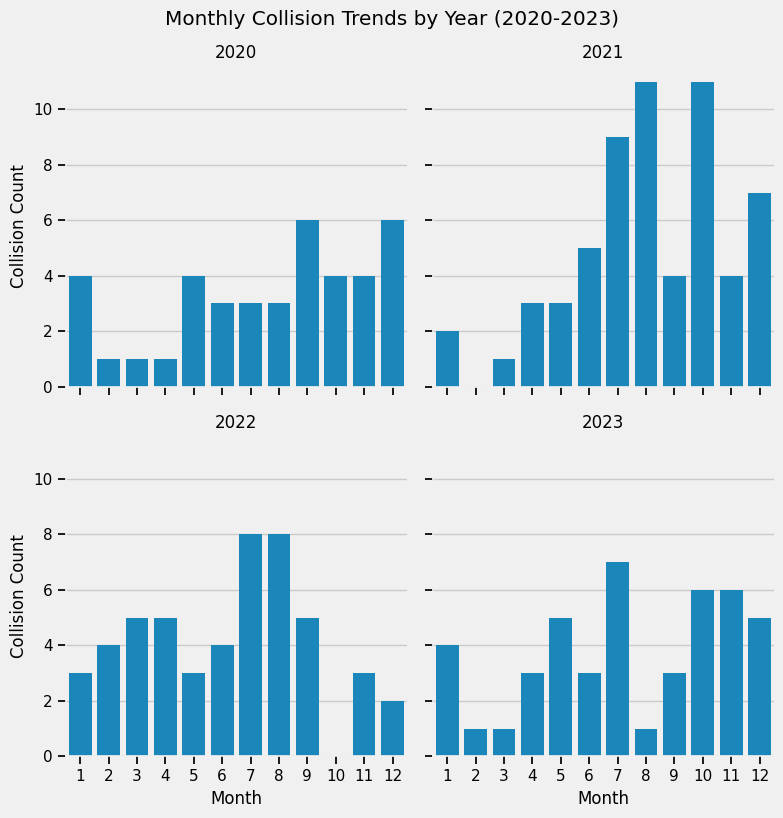

In [58]:
# Ensure the data has necessary columns: 'Year', 'Month' and collision counts
collision_data['Month'] = collision_data['DATE'].dt.month
collision_data['Year'] = collision_data['DATE'].dt.year

# Filter data to include only years from 2021 to 2024
collision_filtered = collision_data[(collision_data['Year'] >= 2020) & (collision_data['Year'] <= 2023)]

# Group the data by 'Year' and 'Month' to count the number of collisions per month per year
monthly_trends = collision_filtered.groupby(['Year', 'Month']).size().reset_index(name='Collision_Count')

# Create separate plots for each year showing monthly collision counts
g = sns.FacetGrid(monthly_trends, col="Year", col_wrap=2, height=4, sharey=True)
g.map(sns.barplot, "Month", "Collision_Count", order=range(1, 13))

# Set titles and labels
g.set_axis_labels("Month", "Collision Count")
g.set_titles("{col_name}")
g.fig.suptitle("Monthly Collision Trends by Year (2020-2023)", y=1.02)

plt.show()

The visualization highlights the monthly collision trends from 2020 to 2023, revealing distinct seasonal patterns and year-specific variations. For most years, the winter months, particularly January, tend to show higher collision counts, likely due to adverse weather conditions affecting road safety. Summer months, such as June and July, often show a moderate rise in collisions, possibly due to increased travel and outdoor activities. The trends also show some year-over-year anomalies, such as reduced collisions in specific months of 2020, potentially influenced by external factors like COVID-19 lockdowns. This detailed breakdown of monthly patterns across individual years helps identify seasonal trends and outliers, offering valuable insights for implementing targeted traffic safety measures and resource allocation.

### Day of the Week Collision Pattern

To further analyze collision patterns, we will examine how collisions are distributed across different days of the week. This analysis can help uncover trends related to weekly activities, such as increased traffic on weekdays due to work commutes or higher collision counts on weekends due to leisure travel. By visualizing these patterns, we can better understand how daily behaviors influence road safety and identify high-risk days for implementing targeted interventions.

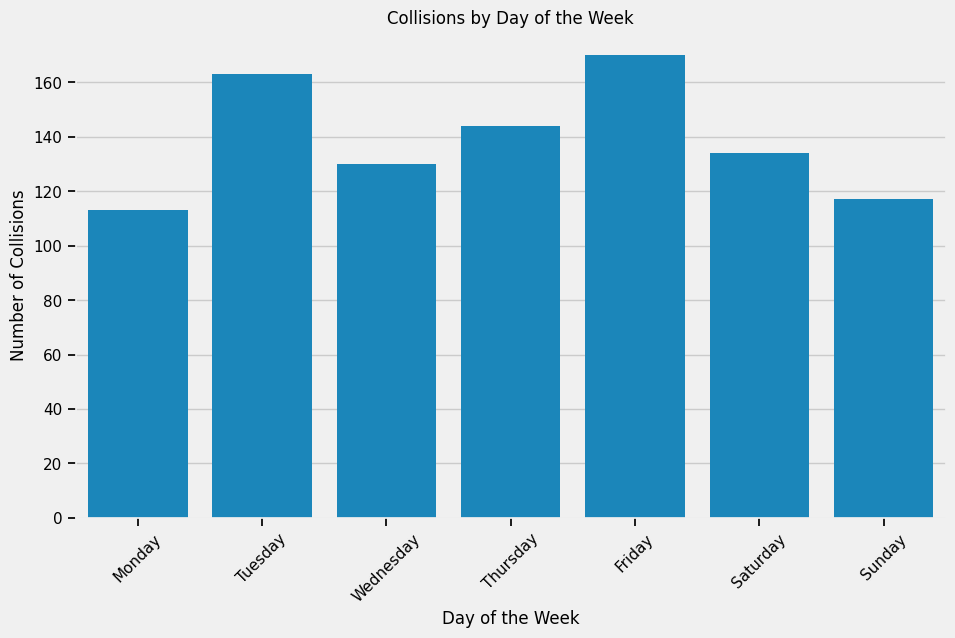

In [59]:
# Plot collisions by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=collision_data, order=['Monday', 'Tuesday', 'Wednesday', 
                                                    'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Collisions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.show()


The bar chart illustrates the distribution of collisions across the days of the week. The data reveals that collisions are most frequent on Friday, suggesting increased road activity as people prepare for the weekend. Tuesday also shows a notably high number of collisions, possibly due to regular weekday commuting. Monday has fewer collisions compared to other weekdays, which may be due to lighter traffic at the beginning of the workweek. Interestingly, weekends (Saturday and Sunday) exhibit a slightly lower number of collisions than weekdays, reflecting reduced commuter traffic but possibly more leisure-related travel. These patterns can help identify high-risk days and inform strategies to improve road safety on specific days of the week.

The code performed a spatial join to integrate collision data with ward data, effectively assigning each collision to a specific ward based on its geographic location. Using the gpd.sjoin method, the collision points were matched to the corresponding ward polygons through a "within" spatial operation, ensuring that each collision was accurately linked to its appropriate ward boundary. After the spatial join, unnecessary columns, such as geometry and index_right, were removed to streamline the dataset for further analysis. The resulting table displays detailed attributes for each collision, including visibility, light conditions, and road surface conditions, along with the assigned ward. This integration is crucial for understanding spatial patterns of collisions across Toronto, identifying wards with higher collision frequencies, and enabling targeted analysis to support predictive modeling, city planning, and traffic safety improvements.

### Relationship between Time-Based Data and other Factors
To gain deeper insights into collision patterns, we will combine month with road conditions. This approach allows us to analyze how different road conditinos interact with time to influence collision occurrences. By exploring these combined patterns, we aim to identify potential correlations and underlying trends that could inform targeted interventions for improving road safety. The following code prepares and visualizes this comprehensive analysis.

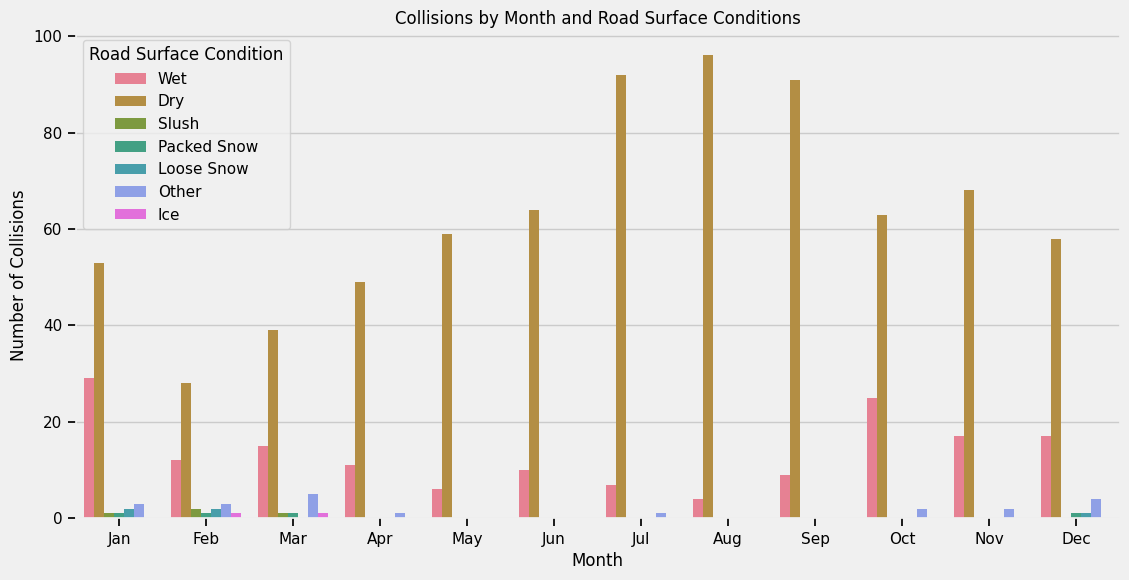

In [33]:
# Group by Month and RDSFCOND (Road Surface Condition)
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Month',
    hue='RDSFCOND',
    data=collision_data,
    order=range(1, 13)  # Months ordered numerically
)
plt.title('Collisions by Month and Road Surface Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.legend(title='Road Surface Condition')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



The bar chart illustrates the number of collisions across different months, categorized by road surface conditions. Notably, dry conditions dominate collision counts throughout the year, with peaks observed during the summer months (July and August), likely reflecting increased road usage during this period. Wet conditions also exhibit a consistent presence but show higher counts during the late fall and winter months (October to December), possibly due to increased rainfall or snowmelt. Icy and snowy conditions, including packed snow and loose snow, are more prominent during the winter months (January and February), as expected. This seasonal variation highlights how road surface conditions impact collision patterns, emphasizing the importance of tailoring road safety measures to seasonal hazards.

### Collisions by Visibility and Light Conditions
To analyze how light and visibility conditions affect collision frequencies, we will examine the number of collisions under varying lighting and visibility conditions. This analysis provides insights into how factors such as daylight, darkness, rain, fog, or snow contribute to collision rates. Understanding these impacts can guide safety measures, such as improving lighting infrastructure and implementing visibility-related advisories to reduce risks.

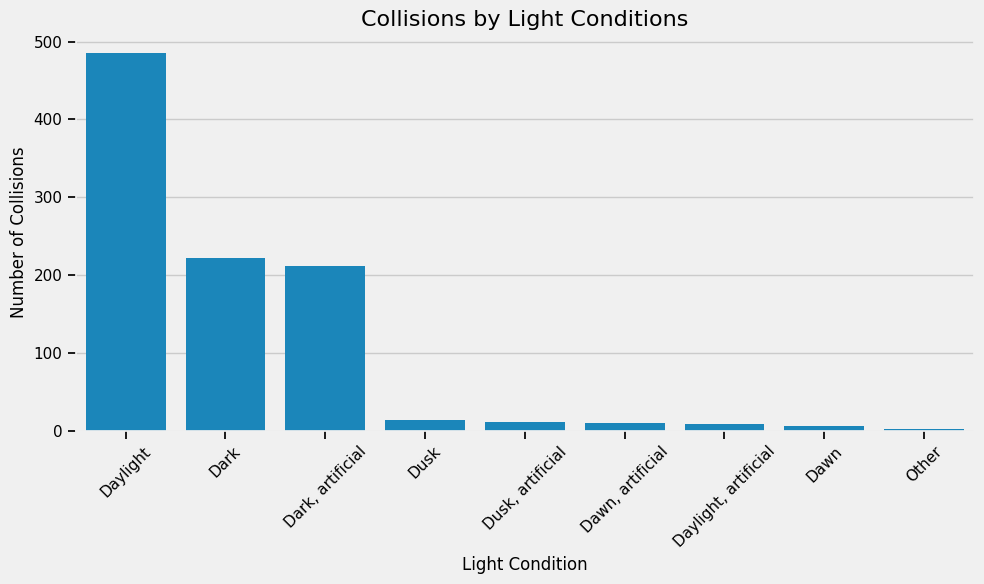

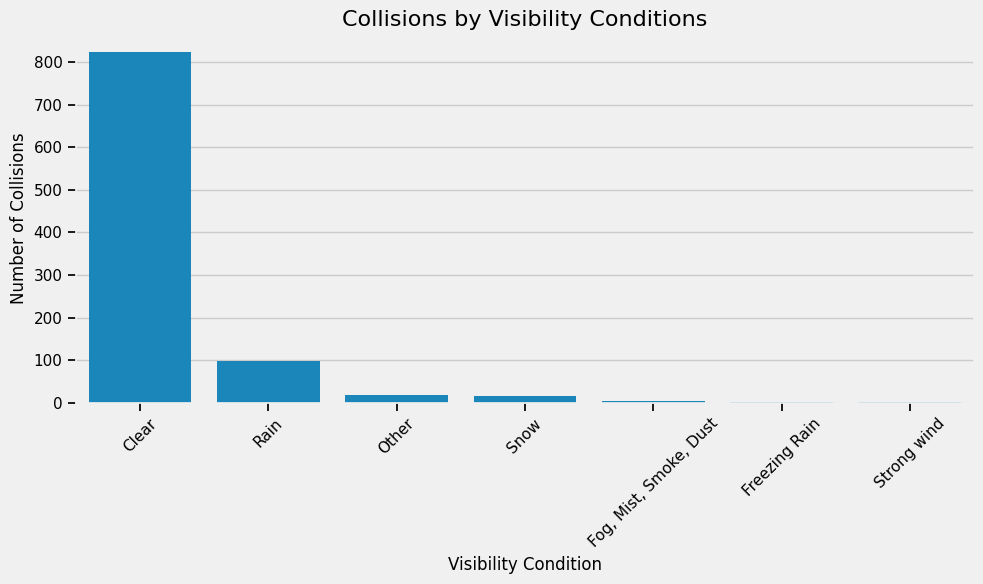

In [60]:
# Plot collisions grouped by light conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='LIGHT', data=collision_data, order=collision_data['LIGHT'].value_counts().index)

# Add plot details
plt.title('Collisions by Light Conditions', fontsize=16)
plt.xlabel('Light Condition', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Plot collisions grouped by visibility conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='VISIBILITY', data=collision_data, order=collision_data['VISIBILITY'].value_counts().index)

# Add plot details
plt.title('Collisions by Visibility Conditions', fontsize=16)
plt.xlabel('Visibility Condition', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


The first graph illustrates the relationship between light conditions and the number of collisions. It is evident that the majority of collisions occur during daylight, followed by dark and dark with artificial light. Collisions under conditions like dusk, dawn, and other light variations are significantly fewer, indicating that visibility plays a key role during these periods.

The second graph shows the number of collisions across different visibility conditions. Clear visibility accounts for the overwhelming majority of collisions, which may reflect higher traffic volumes during such conditions rather than poor visibility alone causing collisions. Rain is the second most common visibility condition associated with collisions, while snow, fog, and other adverse visibility conditions show relatively minimal impact.

These patterns suggest that although poor light and visibility conditions contribute to collisions, other factors like traffic density during clear and daylight conditions may also play a significant role in collision frequency.

## Import Ward Data

To predict the number of collisions in Toronto, the collision data must be spatially joined with the ward boundaries to determine which ward each collision occurred in. This process involves using the geographic coordinates (latitude and longitude) from the collision data and mapping them to the corresponding ward polygons in the ward dataset. After assigning collisions to their respective wards, we can aggregate the number of collisions per ward to identify trends and high-risk areas. This data can then be enriched with additional ward-specific features, such as population, road density, and traffic volume, to build a predictive model. By training a machine learning model with these features, we can forecast collision counts and provide actionable insights for city planning and traffic safety improvements.

In [61]:
# Load the shapefile
ward_shapefile_path = "WARD_WGS84.shx" 
ward_data = gpd.read_file(ward_shapefile_path.replace(".shx", ".shp"))  # Replace with .shp extension

# Create a base map
map_wards = folium.Map(location=[43.7, -79.4], zoom_start=11)  # Adjust to center on Toronto

# Add the ward shapefile to the map
ward_data_json = ward_data.to_json()  # Convert GeoDataFrame to GeoJSON
folium.GeoJson(ward_data_json, name="Wards").add_to(map_wards)

# Display the map
map_wards


## Ward Data Analysis 

In [65]:
# View geoDataFrame
ward_data.head()

AREA_ID AREA_TYPE AREA_S_CD AREA_L_CD            AREA_NAME           X  \
0  2551040      WD18        16        16      Don Valley East  318237.290   
1  2551044      WD18        03        03  Etobicoke-Lakeshore  303099.474   
2  2551048      WD18        15        15      Don Valley West  314825.876   
3  2551052      WD18        23        23    Scarborough North  324522.149   
4  2551056      WD18        11        11  University-Rosedale  313306.543   

           Y  LONGITUDE   LATITUDE  \
0  4844000.0  -79.33298  43.739716   
1  4831000.0  -79.52087  43.621646   
2  4843000.0  -79.37536  43.728396   
3  4852000.0  -79.25467  43.809672   
4  4837000.0  -79.39432  43.671139   

                                            geometry  
0  POLYGON ((-79.31335 43.71699, -79.31950 43.715...  
1  POLYGON ((-79.49777 43.65198, -79.49725 43.651...  
2  POLYGON ((-79.35232 43.71573, -79.35209 43.715...  
3  POLYGON ((-79.22591 43.83960, -79.22556 43.839...  
4  POLYGON ((-79.39004 43.69050, -79.39004 43.690...

In [66]:
# Check the number of columns and rows
ward_data.shape

(25, 10)

In [67]:
# Check the columns in DataFrame
ward_data.columns

Index(['AREA_ID', 'AREA_TYPE', 'AREA_S_CD', 'AREA_L_CD', 'AREA_NAME', 'X', 'Y',
       'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

The columns describe the following:
- 'AREA_ID': A unique identifier for each ward in the dataset.
- 'AREA_TYPE': Indicates the type of area (all is WD18 for wards in the 2018 model of Toronto).
- 'AREA_S_CD': A short code representing the ward, likely numeric.
- 'AREA_L_CD': A longer code that may provide additional context or differentiation for the ward.
- 'AREA_NAME': The official name of the ward.
- X,y : coordiantes in a projected coordinate system.
- Longitude, Latitude: Geographic lat and long of the ward's approximate center.
  
Let's explore the differences between 'AREA_S_CD' and 'AREA_L_CD'.

In [68]:
ward_data['AREA_S_CD'].unique()

array(['16', '03', '15', '23', '11', '10', '09', '05', '17', '08', '02',
       '01', '04', '12', '22', '21', '24', '25', '20', '19', '18', '06',
       '07', '14', '13'], dtype=object)

In [69]:
ward_data['AREA_L_CD'].unique()

array(['16', '03', '15', '23', '11', '10', '09', '05', '17', '08', '02',
       '01', '04', '12', '22', '21', '24', '25', '20', '19', '18', '06',
       '07', '14', '13'], dtype=object)

There are no differences between the two, therefore drop 'AREA_L_CD'. 

These other features will also be dropped:
- Drop 'AREA_ID' and let 'AREA_S_CD' act as the only identifier of the wards.
- Drop 'AREA_TYPE' as all wards are of type WD18, therefore, no new information or classification is provided. 

In [70]:
# Drop unnecessary columns 
ward_data = ward_data.drop(columns = ['AREA_ID', 'AREA_S_CD', 'AREA_TYPE', 'X', 'Y', 'LONGITUDE', 'LATITUDE'], errors='ignore')

# Check the columnsare dropped in geoDataFrame
ward_data.columns

Index(['AREA_L_CD', 'AREA_NAME', 'geometry'], dtype='object')

In [71]:
# Check data types per column
print(ward_data.dtypes)

AREA_L_CD      object
AREA_NAME      object
geometry     geometry
dtype: object


## Ward Data Cleaning

In [72]:
# Check for missing values
print(ward_data.isnull().sum())
# Check for duplicates
ward_data.duplicated().sum()

AREA_L_CD    0
AREA_NAME    0
geometry     0
dtype: int64


0

In [73]:
# View geoDataFrame
ward_data.head()

AREA_L_CD            AREA_NAME  \
0        16      Don Valley East   
1        03  Etobicoke-Lakeshore   
2        15      Don Valley West   
3        23    Scarborough North   
4        11  University-Rosedale   

                                            geometry  
0  POLYGON ((-79.31335 43.71699, -79.31950 43.715...  
1  POLYGON ((-79.49777 43.65198, -79.49725 43.651...  
2  POLYGON ((-79.35232 43.71573, -79.35209 43.715...  
3  POLYGON ((-79.22591 43.83960, -79.22556 43.839...  
4  POLYGON ((-79.39004 43.69050, -79.39004 43.690...

The results indicate that there are no missing values or duplicate rows across key attributes like AREA_L_CD, AREA_NAME, X, Y, LONGITUDE, LATITUDE, and geometry. This suggests that the dataset is clean and ready for subsequent analysis, ensuring the integrity of the data for spatial operations and further processing.

## Overlay Collision Data onto Ward Data 


Overlaying the collision data onto the ward data is essential for spatial analysis and understanding where collisions are occurring within the city. By mapping each collision to a specific ward, we can identify patterns and trends in collision occurrences relative to geographic boundaries. This allows for aggregating the number of collisions per ward, which is critical for targeted analysis, policy-making, and resource allocation. For example, high-collision wards can be prioritized for road safety improvements or public awareness campaigns. Additionally, integrating collision data with ward-specific attributes such as population, traffic volume, or road density enables more accurate predictive modeling and helps address traffic safety issues more effectively.


Converting collision data into a GeoDataFrame is essential for spatial analysis, as it allows for operations like spatial joins, overlays, and mapping. By creating a geometry column from LATITUDE and LONGITUDE, each collision is represented as a precise point in space. Assigning a Coordinate Reference System (CRS), such as EPSG:4326 (WGS84), ensures the data aligns accurately with other spatial datasets, like ward boundaries. This conversion enables mapping collisions to specific wards, visualizing spatial patterns, and ensuring compatibility with geospatial tools, making it a critical step for reliable and accurate analysis.

In [74]:
# Convert collision data to GeoDataFrame
collision_data["geometry"] = collision_data.apply(lambda row: Point(row["LONGITUDE"], row["LATITUDE"]), axis=1)
collision_data = gpd.GeoDataFrame(collision_data, geometry="geometry", crs="EPSG:4326")

In [75]:
# Ensure CRS matches
if collision_data.crs != ward_data.crs:
    collisio_data = collision_data.to_crs(ward_data.crs)

# Spatial join to find which ward each collision occurred in
collision_with_wards = gpd.sjoin(collision_data, ward_data, how="left", op="within")

# Display the results
print(collision_with_wards.head())

# Visualize on a map
map_wards = folium.Map(location=[43.7, -79.4], zoom_start=11)
ward_data_json = ward_data.to_json()
folium.GeoJson(ward_data_json, name="Wards").add_to(map_wards)

# Add collision points
for _, row in collision_data.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6
    ).add_to(map_wards)

map_wards

                 DATE  TIME   LATITUDE  LONGITUDE VISIBILITY     LIGHT  \
0 2006-01-07 05:00:00  2325  43.842745  -79.22479      Clear      Dark   
1 2006-01-08 05:00:00  1828  43.721445  -79.55809      Clear      Dark   
2 2006-01-09 05:00:00  1435  43.769445  -79.28229      Clear  Daylight   
3 2006-01-11 05:00:00  1120  43.722045  -79.30799      Clear  Daylight   
4 2006-01-21 05:00:00  1829  43.779345  -79.27559      Clear      Dusk   

  RDSFCOND ACCLASS    INVAGE DRIVCOND  ... ALCOHOL DISABILITY  \
0      Wet   Fatal  50 to 54  Unknown  ...    None       None   
1      Dry   Fatal  10 to 14     None  ...    None       None   
2      Dry   Fatal  75 to 79     None  ...    None       None   
3      Wet   Fatal  15 to 19     None  ...    None       None   
4      Dry   Fatal  50 to 54     None  ...    None       None   

                     geometry  Year Month  DayOfWeek Hour index_right  \
0  POINT (-79.22479 43.84275)  2006     1   Saturday    5        17.0   
1  POINT (-79.5580

In [76]:
# Perform the spatial join to find which ward each collision occurred in
collision_with_wards = gpd.sjoin(collision_data, ward_data, how="left", op="within")

# Drop unnecessary geometry columns for tabular display
collision_table = collision_with_wards.drop(columns=["geometry", "index_right"])

# Display the table in the notebook
collision_table.head()  # Display first few rows of the table

DATE  TIME   LATITUDE  LONGITUDE VISIBILITY     LIGHT  \
0 2006-01-07 05:00:00  2325  43.842745  -79.22479      Clear      Dark   
1 2006-01-08 05:00:00  1828  43.721445  -79.55809      Clear      Dark   
2 2006-01-09 05:00:00  1435  43.769445  -79.28229      Clear  Daylight   
3 2006-01-11 05:00:00  1120  43.722045  -79.30799      Clear  Daylight   
4 2006-01-21 05:00:00  1829  43.779345  -79.27559      Clear      Dusk   

  RDSFCOND ACCLASS    INVAGE DRIVCOND  ... AG_DRIV REDLIGHT ALCOHOL  \
0      Wet   Fatal  50 to 54  Unknown  ...    None     None    None   
1      Dry   Fatal  10 to 14     None  ...     Yes     None    None   
2      Dry   Fatal  75 to 79     None  ...    None     None    None   
3      Wet   Fatal  15 to 19     None  ...     Yes     None    None   
4      Dry   Fatal  50 to 54     None  ...     Yes     None    None   

  DISABILITY  Year Month  DayOfWeek Hour AREA_L_CD               AREA_NAME  
0       None  2006     1   Saturday    5        25  Scarborough-Rouge Park  
1       None  2006     1     Sunday    5        01         Etobicoke North  
2       None  2006     1     Monday    5        21      Scarborough Centre  
3       None  2006     1  Wednesday    5        16         Don Valley East  
4       None  2006     1   Saturday    5        23       Scarborough North  

[5 rows x 28 columns]

In [89]:
collision_data.columns

Index(['DATE', 'TIME', 'LATITUDE', 'LONGITUDE', 'VISIBILITY', 'LIGHT',
       'RDSFCOND', 'ACCLASS', 'INVAGE', 'DRIVCOND', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'geometry',
       'Year', 'Month', 'DayOfWeek', 'Hour'],
      dtype='object')

## Exploratory Data Analysis with Collision and Ward Data (2021 to 2024)

The exploratory data analysis (EDA) linking collision data to ward data focuses on understanding how traffic incidents are distributed across different geographic regions. By spatially associating each collision with its corresponding ward, we aim to identify high-risk areas, observe regional patterns, and analyze variations in collision frequency. This analysis allows us to explore how factors such as road conditions, traffic density, and infrastructure might vary across wards, influencing collision rates. By integrating collision and ward data, we can generate valuable insights to prioritize safety improvements, allocate resources effectively, and support data-driven decision-making at a regional level.

### Collisions Across Wards from 2021 to 2024

When analyzing the number of collisions within each ward, patterns may emerge regarding high-collision areas versus wards with lower collision counts. This type of analysis is critical for understanding geographic trends in collision frequency. High-collision wards might correspond to regions with greater population density, higher traffic volumes, or complex road infrastructure, while low-collision wards might indicate less urbanized or lower-traffic areas.

Before diving into this section, we aim to refine our collision dataset by filtering for data between the years 2021 and 2024, providing a recent and focused analysis. This filtered dataset will then be spatially joined with ward boundaries to associate each collision with its respective ward. By organizing the results chronologically by ward number and calculating the percentage distribution of collisions across wards, we gain a clear understanding of collision patterns in different regions. This step is essential for identifying high-collision areas and drawing meaningful insights to inform regional safety strategies and resource allocation.

In [77]:
# Convert the 'DATE' column to datetime for filtering
collision_data["DATE"] = pd.to_datetime(collision_data["DATE"])

# Filter collisions from 2021 to 2024
collision_2021_2024 = collision_data[(collision_data["DATE"].dt.year >= 2021) & (collision_data["DATE"].dt.year <= 2024)]

# Perform the spatial join to associate collisions with wards
collision_with_wards = gpd.sjoin(collision_2021_2024, ward_data, how="left", predicate="within")

# Clean up the resulting DataFrame by dropping unnecessary geometry and index columns
collision_table = collision_with_wards.drop(columns=["geometry", "index_right"])

# Group collisions by ward number and name, maintaining chronological order
ward_collision_counts = collision_table.groupby(["AREA_L_CD", "AREA_NAME"]).size().reset_index(name="Number of Collisions")

# Sort wards in ascending order by ward number
ward_collision_counts = ward_collision_counts.sort_values(by="AREA_L_CD")

# Calculate the percentage of collisions for each ward
total_collisions = ward_collision_counts["Number of Collisions"].sum()
ward_collision_counts["Percentage of Collisions"] = (ward_collision_counts["Number of Collisions"] / total_collisions) * 100

# Display the summary DataFrame
ward_collision_counts.head(25)

AREA_L_CD                 AREA_NAME  Number of Collisions  \
0         01           Etobicoke North                     9   
1         02          Etobicoke Centre                     8   
2         03       Etobicoke-Lakeshore                    18   
3         04        Parkdale-High Park                     6   
4         05         York South-Weston                     3   
5         06               York Centre                     8   
6         07  Humber River-Black Creek                     6   
7         08         Eglinton-Lawrence                     5   
8         09                 Davenport                     2   
9         10         Spadina-Fort York                     9   
10        11       University-Rosedale                     4   
11        12        Toronto-St. Paul's                     9   
12        13            Toronto Centre                     6   
13        14          Toronto-Danforth                     9   
14        15           Don Valley West                     1   
15        16           Don Valley East                     3   
16        17          Don Valley North                     3   
17        18                Willowdale                     3   
18        19         Beaches-East York                     3   
19        20     Scarborough Southwest                     9   
20        21        Scarborough Centre                    11   
21        22     Scarborough-Agincourt                     7   
22        23         Scarborough North                     3   
23        24     Scarborough-Guildwood                     5   
24        25    Scarborough-Rouge Park                     5   

    Percentage of Collisions  
0                   5.806452  
1                   5.161290  
2                  11.612903  
3                   3.870968  
4                   1.935484  
5                   5.161290  
6                   3.870968  
7                   3.225806  
8                   1.290323  
9                   5.806452  
10                  2.580645  
11                  5.806452  
12                  3.870968  
13                  5.806452  
14                  0.645161  
15                  1.935484  
16                  1.935484  
17                  1.935484  
18                  1.935484  
19                  5.806452  
20                  7.096774  
21                  4.516129  
22                  1.935484  
23                  3.225806  
24                  3.225806

In [78]:
# Save the table to a CSV file for further analysis if needed
ward_collision_counts.to_csv("ward_collision_summary_2021_2024.csv", index=False)


The table displays the distribution of collisions across various wards from 2021 to 2024. Each ward is represented by its unique identifier (AREA_L_CD) and name (AREA_NAME), along with the total number of collisions and their respective percentage share of the overall collisions. Notably, certain wards such as Etobicoke-Lakeshore (Ward 03) and Toronto-Danforth (Ward 14) exhibit the highest percentages of collisions, at 10%. Meanwhile, several wards, including Don Valley East (Ward 16) and Scarborough-Guildwood (Ward 24), show significantly fewer collisions, each contributing only 1.67% to the total. This data underscores the varying levels of traffic-related incidents across the city's wards, providing a valuable foundation for prioritizing targeted interventions and improving road safety in high-risk areas.

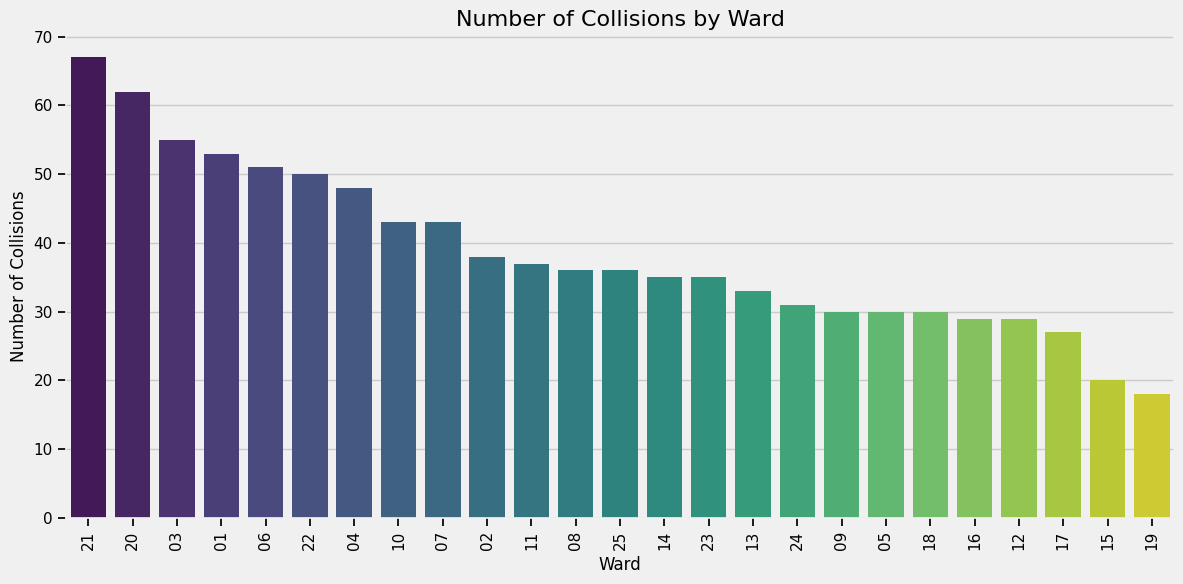

In [35]:
# Group the collision data by ward and count the number of collisions in each ward
ward_collision_counts = collision_table['AREA_L_CD'].value_counts()

# Convert to a DataFrame for easier manipulation
ward_collision_df = ward_collision_counts.reset_index()
ward_collision_df.columns = ['Ward', 'Number of Collisions']

# Sort the data by the number of collisions for better visualization
ward_collision_df = ward_collision_df.sort_values(by='Number of Collisions', ascending=False)

# Plot the number of collisions in each ward
plt.figure(figsize=(12, 6))
sns.barplot(data=ward_collision_df, x='Ward', y='Number of Collisions', palette='viridis')
plt.title('Number of Collisions by Ward', fontsize=16)
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Number of Collisions', fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.tight_layout()  # Adjust the layout to avoid overlapping labels
plt.show()

The bar chart illustrates the distribution of collisions across different wards. Ward 21 stands out with the highest number of collisions, followed closely by Ward 20. These two wards demonstrate significantly higher collision counts compared to others, indicating potential high-risk areas. On the other end of the spectrum, Wards 19 and 15 report the lowest number of collisions, suggesting these areas may experience fewer traffic-related incidents. The gradual decline in collision counts from the highest to lowest wards highlights variability in traffic safety conditions and infrastructure across the wards. This analysis underscores the importance of targeted interventions in high-collision wards to improve road safety.

### Collisions across all Wards every month from 2021 to 2024

To gain a deeper understanding of collision patterns across different wards over time, we will generate both a tabular and visual representation of the number of collisions occurring in each ward per month from 2021 to 2023. The table provides a clear breakdown of collision counts by ward, organized by year and month, offering a detailed view of temporal trends. Following this, a bar graph visually highlights these trends, enabling easy comparison of collision counts across wards and months. These insights are essential for identifying high-risk periods and areas, aiding in targeted road safety interventions and policy-making.

In [90]:
# Convert the 'DATE' column to datetime for filtering
collision_data["DATE"] = pd.to_datetime(collision_data["DATE"])

# Filter collisions from 2021 to 2023
collision_filtered = collision_data[
    (collision_data["DATE"].dt.year >= 2021) & (collision_data["DATE"].dt.year <= 2023)
]

# Extract year and month from the 'DATE' column
collision_filtered["Year"] = collision_filtered["DATE"].dt.year
collision_filtered["Month"] = collision_filtered["DATE"].dt.month

# Perform the spatial join to associate collisions with wards
collision_with_wards = gpd.sjoin(collision_filtered, ward_data, how="left", predicate="within")

# Group collisions by ward number, ward name, and month
ward_monthly_collisions = (
    collision_with_wards.groupby(["AREA_L_CD", "AREA_NAME", "Year", "Month"])
    .size()
    .reset_index(name="Number of Collisions")
)

# Pivot the table to display months as columns
ward_monthly_pivot = ward_monthly_collisions.pivot_table(
    index=["AREA_L_CD", "AREA_NAME"],
    columns=["Year", "Month"],
    values="Number of Collisions",
    fill_value=0
)

# Flatten multi-level columns for readability
ward_monthly_pivot.columns = [f"{year}-{month:02}" for year, month in ward_monthly_pivot.columns]

# Reset the index to make it a clean DataFrame
ward_monthly_pivot.reset_index(inplace=True)

# Display the first few rows of the resulting DataFrame
ward_monthly_pivot.head(25)


AREA_L_CD                 AREA_NAME  2021-01  2021-03  2021-04  2021-05  \
0         01           Etobicoke North        1        0        0        0   
1         02          Etobicoke Centre        0        0        0        0   
2         03       Etobicoke-Lakeshore        0        0        0        0   
3         04        Parkdale-High Park        0        0        0        0   
4         05         York South-Weston        0        0        0        0   
5         06               York Centre        1        0        0        0   
6         07  Humber River-Black Creek        0        0        1        0   
7         08         Eglinton-Lawrence        0        0        0        0   
8         09                 Davenport        0        0        0        0   
9         10         Spadina-Fort York        0        0        1        0   
10        11       University-Rosedale        0        0        0        0   
11        12        Toronto-St. Paul's        0        0        0        0   
12        13            Toronto Centre        0        0        0        1   
13        14          Toronto-Danforth        0        0        0        1   
14        15           Don Valley West        0        0        0        0   
15        16           Don Valley East        0        0        0        0   
16        17          Don Valley North        0        0        0        0   
17        18                Willowdale        0        0        0        0   
18        19         Beaches-East York        0        0        1        0   
19        20     Scarborough Southwest        0        0        0        1   
20        21        Scarborough Centre        0        0        0        0   
21        22     Scarborough-Agincourt        0        1        0        0   
22        23         Scarborough North        0        0        0        0   
23        24     Scarborough-Guildwood        0        0        0        0   
24        25    Scarborough-Rouge Park        0        0        0        0   

    2021-06  2021-07  2021-08  2021-09  ...  2023-03  2023-04  2023-05  \
0         0        3        0        0  ...        0        1        0   
1         0        1        0        0  ...        1        0        1   
2         1        1        1        0  ...        0        1        0   
3         0        0        1        0  ...        0        0        0   
4         0        0        0        1  ...        0        0        0   
5         0        1        0        0  ...        0        0        1   
6         1        0        0        0  ...        0        0        0   
7         0        0        2        0  ...        0        0        0   
8         0        0        0        0  ...        0        0        0   
9         0        0        2        0  ...        0        0        0   
10        0        0        1        1  ...        0        0        0   
11        0        0        0        0  ...        0        0        0   
12        0        0        0        0  ...        0        0        0   
13        0        1        1        1  ...        0        0        0   
14        0        0        0        0  ...        0        0        0   
15        0        0        0        0  ...        0        0        0   
16        0        0        1        0  ...        0        0        0   
17        1        0        1        0  ...        0        0        0   
18        0        0        0        0  ...        0        1        0   
19        0        1        0        0  ...        0        0        0   
20        0        0        0        0  ...        0        0        1   
21        2        0        0        1  ...        0        0        0   
22        0        0        0        0  ...        0        0        1   
23        0        0        1        0  ...        0        0        1   
24        0        1        0        0  ...        0        0        0   

    2023-06  2023-07  2023-08  2023-09  2023-10  

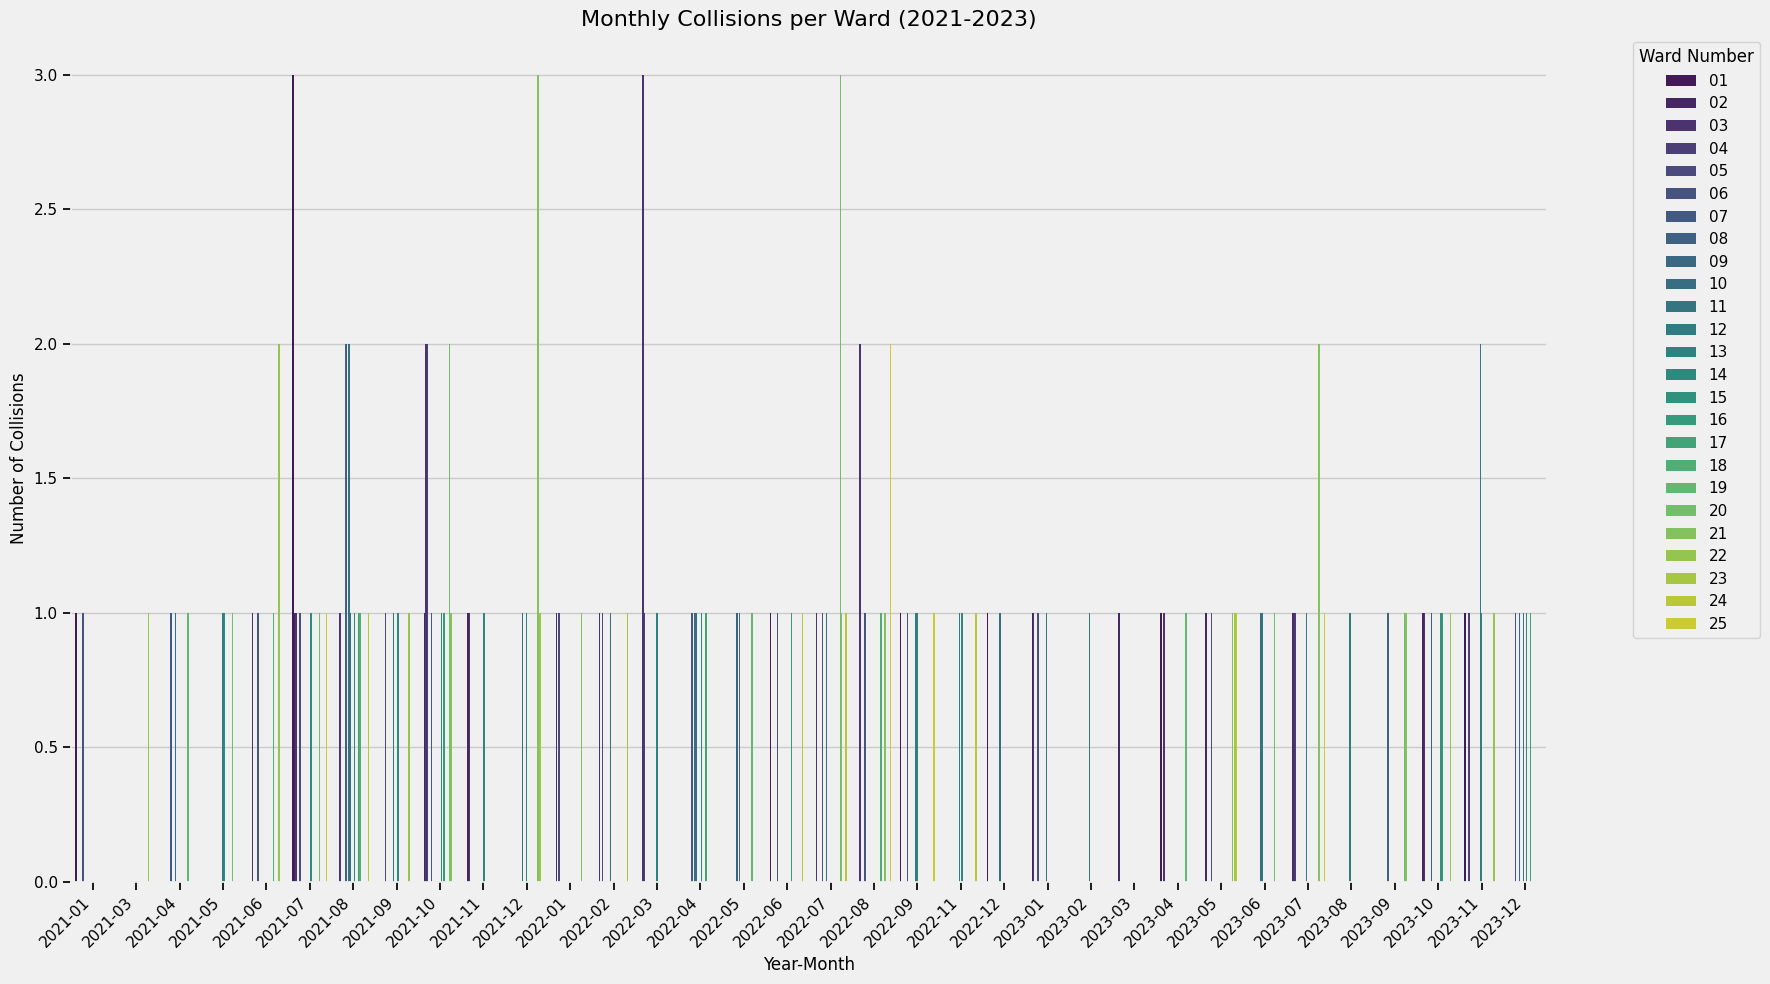

In [84]:
# Melt the pivot table to create a long-form DataFrame suitable for grouped bar plots
ward_monthly_melted = ward_monthly_pivot.melt(
    id_vars=["AREA_L_CD", "AREA_NAME"],
    var_name="Year-Month",
    value_name="Collisions"
)

# Plot the bar graph
plt.figure(figsize=(18, 10))
sns.barplot(
    data=ward_monthly_melted,
    x="Year-Month",
    y="Collisions",
    hue="AREA_L_CD",
    palette="viridis"
)

# Add titles and labels
plt.title("Monthly Collisions per Ward (2021-2023)", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Collisions", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Ward Number", loc="upper right", bbox_to_anchor=(1.15, 1))

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


The bar graph depicts the monthly distribution of collisions across all wards from 2021 to 2023, with each ward represented by a distinct color. While the collision counts remain relatively low per month for individual wards, the data reveals some variations. The highest collision count is 3, observed in specific months for certain wards, while many months across various wards show the lowest value of 0 collisions. This visualization helps pinpoint wards and timeframes with elevated collision activity, offering an opportunity to analyze potential factors contributing to these spikes, such as seasonal trends or ward-specific conditions.

### Collisions based on Visibility and Light across all Wards 

To better understand the factors influencing traffic collisions across all wards, the upcoming analysis examines the relationship between collisions and environmental conditions, specifically visibility and light. By categorizing collisions based on visibility (e.g., clear, rain, fog) and light conditions (e.g., daylight, darkness), this code allows us to uncover trends and patterns that highlight how environmental factors may vary across different wards. This insight can inform targeted road safety measures tailored to specific conditions and areas, ultimately helping to reduce the risk of collisions.

In [92]:
# Convert the 'DATE' column to datetime for filtering
collision_data["DATE"] = pd.to_datetime(collision_data["DATE"])

# Filter collisions from 2021 to 2024
collision_2021_2024 = collision_data[(collision_data["DATE"].dt.year >= 2021) & (collision_data["DATE"].dt.year <= 2024)]

# Perform the spatial join to associate collisions with wards
collision_with_wards = gpd.sjoin(collision_2021_2024, ward_data, how="left", predicate="within")

# Clean up the resulting DataFrame by dropping unnecessary geometry and index columns
collision_table = collision_with_wards.drop(columns=["geometry", "index_right"])

# Group by ward, visibility, and light conditions to calculate the number of collisions
visibility_light_collisions = collision_table.groupby(
    ["AREA_L_CD", "AREA_NAME", "VISIBILITY", "LIGHT"]
).size().reset_index(name="Number of Collisions")

# Pivot the table to better visualize visibility and light conditions as columns
visibility_light_pivot = visibility_light_collisions.pivot_table(
    index=["AREA_L_CD", "AREA_NAME"],
    columns=["VISIBILITY", "LIGHT"],
    values="Number of Collisions",
    fill_value=0
)

# Reset the index for a cleaner table format
visibility_light_pivot.reset_index(inplace=True)

# Display the resulting DataFrame
visibility_light_pivot.head(25)


VISIBILITY AREA_L_CD                 AREA_NAME Clear                        \
LIGHT                                           Dark Dark, artificial Dawn   
0                 01           Etobicoke North     0                3    0   
1                 02          Etobicoke Centre     0                4    0   
2                 03       Etobicoke-Lakeshore     1                4    0   
3                 04        Parkdale-High Park     1                1    0   
4                 05         York South-Weston     0                2    0   
5                 06               York Centre     2                1    0   
6                 07  Humber River-Black Creek     1                1    0   
7                 08         Eglinton-Lawrence     1                2    0   
8                 09                 Davenport     0                1    0   
9                 10         Spadina-Fort York     1                5    0   
10                11       University-Rosedale     0                0    0   
11                12        Toronto-St. Paul's     1                1    0   
12                13            Toronto Centre     0                3    0   
13                14          Toronto-Danforth     0                5    0   
14                15           Don Valley West     0                0    0   
15                16           Don Valley East     0                1    0   
16                17          Don Valley North     0                1    0   
17                18                Willowdale     1                0    0   
18                19         Beaches-East York     0                0    0   
19                20     Scarborough Southwest     1                3    0   
20                21        Scarborough Centre     2                3    0   
21                22     Scarborough-Agincourt     0                1    0   
22                23         Scarborough North     1                0    0   
23                24     Scarborough-Guildwood     0                1    1   
24                25    Scarborough-Rouge Park     3                2    0   

VISIBILITY                                                                  \
LIGHT      Dawn, artificial Daylight Daylight, artificial Dusk, artificial   
0                         0        5                    0                0   
1                         0        2                    0                0   
2                         0       11                    0                0   
3                         0        3                    0                1   
4                         0        1                    0                0   
5                         1        2                    0                0   
6                         0        3                    0                0   
7                         0        1                    0                0   
8                         0        0                    0                0   
9                         0        2                    0                0   
10                        0        4                    0                0   
11                        0        5                    1                0   
12                        0        3                    0                0   
13                        0        2                    0                0   
14                        0        1                    0                0   
15                        0        1                    0                0   
16                        0        2                    0                0   
17                        0        2                    0                0   
18                        0        3                    0                0   
19                        0        4                    0                1   
20                        0        5                    0                0   
21                        0        4                    0                0   
22                   

In [98]:
# Define all possible categories for LIGHT and VISIBILITY
light_conditions = [
    "Daylight", "Dark", "Dark (Artificial)", "Dawn", "Dawn (Artificial)",
    "Dusk", "Dusk (Artificial)", "Daylight (Artificial)", "Other"
]
visibility_conditions = [
    "Clear", "Rain", "Snow", "Fog, Mist, Smoke, Dust", "Freezing Rain",
    "Strong Wind", "Other"
]

# Ensure these categories exist in the 'LIGHT' and 'VISIBILITY' columns
collision_with_wards['LIGHT'] = collision_with_wards['LIGHT'].astype('category')
collision_with_wards['LIGHT'] = collision_with_wards['LIGHT'].cat.add_categories(light_conditions)

collision_with_wards['VISIBILITY'] = collision_with_wards['VISIBILITY'].astype('category')
collision_with_wards['VISIBILITY'] = collision_with_wards['VISIBILITY'].cat.add_categories(visibility_conditions)

# Group data by ward, light, and visibility conditions
light_visibility_ward_table = collision_with_wards.groupby(
    ["AREA_L_CD", "AREA_NAME", "LIGHT", "VISIBILITY"]
).size().reset_index(name="Number of Collisions")

# Pivot the table to show counts for each light and visibility condition per ward
pivot_table = light_visibility_ward_table.pivot_table(
    index=["AREA_L_CD", "AREA_NAME"],
    columns=["LIGHT", "VISIBILITY"],
    values="Number of Collisions",
    fill_value=0
)

# Reset index to make it more readable
pivot_table.reset_index(inplace=True)

# Display the updated table
print(pivot_table.head())  # Display the first few rows of the table

# Visualize collisions related to light and visibility
pivot_table_melted = pivot_table.melt(
    id_vars=["AREA_L_CD", "AREA_NAME"],
    var_name=["Condition", "Visibility"],
    value_name="Collision Count"
)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=pivot_table_melted,
    x="AREA_L_CD",
    y="Collision Count",
    hue="Condition"
)
plt.title("Collisions Across Wards by Light and Visibility Conditions")
plt.xlabel("Ward Number")
plt.ylabel("Number of Collisions")
plt.xticks(rotation=45)
plt.legend(title="Light Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



ValueError: new categories must not include old categories: {'Dawn', 'Dusk', 'Daylight', 'Daylight (Artificial)', 'Dawn (Artificial)', 'Dark', 'Dusk (Artificial)'}